# Which Neighborhood in Pittsburgh is the Healthiest?

 ## by the Big Idea Health Inspectors (Emma Chau, Kathryn Kolor, and Kate Towsen)

![UPMC Building, Pittsburgh](https://theforeword.org/wp-content/uploads/2021/03/9it00kh9-6-1555528431-jpg-3-1560739002-jpg-4-1583946675-900x630.jpg)

### Introduction

Health is an important component of quality of life, and it can vary from community to community for a variety of reasons. As students living in Pittsburgh, we wanted to assess which neighborhood is the healthiest. Since Pittsburgh is not known to have the best air quality, respiratory health became our area of interest. Under the umbrella of things impacting respiratory health falls COVID-19, asthma, and smoking. Any future Pittsburgh residents deciding on a neighborhood to call home would be interested in knowing which neighborhood is the healthiest. With this project, we gauge which neighborhood is the healthiest by looking at the total number of COVID-19 vaccinations, the ratio of asthma healthcare use to the number of members in the neighborhood, and the number of clean indoor air act exemptions (which allow indoor smoking).

### The Overall Metric: Neighborhood Health

We gauged the health of the neighborhoods by looking at:
1. Total number of COVID-19 vaccinations by neighborhood
2. Ratio of asthma healthcare use to number of neighborhood members
3. Total number of indoor air act exemptions by neighborhood

The datasets we used to gauge neighborhood health were:
1. <a href="https://data.wprdc.org/dataset/allegheny-county-covid-19-vaccinations" target=" _blank">Allegheny County COVID-19 Vaccine Historical Municipal Data</a> **(Kate)**

This dataset contains the number of partial vaccinations, full vaccinations, and vaccinations with booster totals for each neighborhood in Allegheny County.

2.  <a href="https://data.wprdc.org/dataset/childhood-asthma-healthcare-utilization/resource/61022ad9-c601-4152-9ba6-da915fd05be5?view_id=3a1bd8d0-0881-483f-8391-18c0cbca6c10" target=" _blank">Childhood Asthma Healthcare Utilization (2017)</a> **(Emma)**

This dataset looks at healthcare utilization by Allegeny County children who had a emergency department visit, emergy department hospitilizaiton, or urgent care visit for asthma.

3. <a href="https://data.wprdc.org/dataset/allegheny-county-census-tracts-2016" target=" _blank">Allegheny County Census Tracts 2016</a> **(Emma)**

This dataset is an Allegheny County extract of the 2016 US Census Tracts.

4. <a href="https://data.wprdc.org/dataset/2010-census-tracts" target=" _blank">2010 Census Tracts</a> **(Emma)**

This dataset looks at 2010 Census Tracts for the city of Pittsburgh.

5. <a href="https://data.wprdc.org/dataset/allegheny-county-clean-indoor-air-act-exemptions" target=" _blank">Allegheny County Clean Indoor Air Act Exemptions</a> **(Kathryn)**

This dataset shows the location of all businesses and social clubs in Allegheny County that have received an exemption from the PA Clean Indoor Air Act.

### Metric #1: Total Number of COVID-19 Vaccinations by Neighborhood (Kate Towsen)

Let's find the healthiest neighborhood by looking at the total number of COVID-19 Vaccinations! Total number of vaccinations will be calculated by adding up the number of partial, full, and boosted vaccinated individuals for each neighborhood. Additionally, as the dataset includes all of Allegheny County, non-Pittsburgh neighborhoods will not count towards the healthiest neighborhood.

First, lets import all of the needed libraries.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Next, let's load in the vaccination data for neighborhoods in Allegheny County.

In [3]:
covid_data = pd.read_csv('https://data.wprdc.org/datastore/dump/b1c946bb-1c25-4ae2-9ac0-93301a77978e')
covid_data.sample(5)

,month,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
3471,2021-12-01,East Hills (Pittsburgh),86,51,142
2167,2022-05-01,Southside Slopes (Pittsburgh),11,13,12
1885,2021-12-01,Glassport,81,95,299
4520,2022-06-01,Neville,1,3,5
1104,2021-07-01,Crescent,35,29,0


We see that the dataset includes the month, neighborhood, number of partial vaccinations, full vaccinations, and full vaccinations with boosters. Let's make a copy of the data so that we can sum up the vaccination columns and create a new total vaccinations column.

In [4]:
covidcopy= covid_data.copy()
covidcopy['total_vaccinations']= covidcopy["total_partially_vaccinated"] + covidcopy["total_fully_vaccinated"] +  covidcopy["total_fully_vaccinated_w_booster"]
covidcopy.head()

,month,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster,total_vaccinations
0,2020-12-01,East Liberty (Pittsburgh),174,1,0,175
1,2020-12-01,Greenfield (Pittsburgh),214,1,0,215
2,2020-12-01,Morningside (Pittsburgh),105,1,0,106
3,2020-12-01,Richland,212,1,0,213
4,2020-12-01,South Oakland (Pittsburgh),57,1,0,58


Now we have the total vaccinations calculated for each neighborhood in Allegheny County. 

Next, we need to get the data for just the Pittsburgh neighborhoods. This dataset was organized such that if the neighborhood is located in Pittsburgh, Pittsburgh is written following the neighborhood name in parenthesis. We need to iterate through the rows in the data frame using `.iterrows()` to filter out the data for neighborhoods outside of Pittsburgh.

In [5]:
clist= []
for index, row in covidcopy.iterrows():
    if '(Pittsburgh)' in row ['neighborhood_municipality']:
        clist.append(row)
burgh_covid= pd.DataFrame(clist)
burgh_covid

,month,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster,total_vaccinations
0,2020-12-01,East Liberty (Pittsburgh),174,1,0,175
1,2020-12-01,Greenfield (Pittsburgh),214,1,0,215
2,2020-12-01,Morningside (Pittsburgh),105,1,0,106
4,2020-12-01,South Oakland (Pittsburgh),57,1,0,58
7,2021-01-01,Beechview (Pittsburgh),388,147,0,535
...,...,...,...,...,...,...
4642,2022-09-01,Marshall-Shadeland (Pittsburgh),11,10,6,27
4643,2022-09-01,Northview Heights (Pittsburgh),11,2,0,13
4648,2022-09-01,Point Breeze (Pittsburgh),1,3,0,4
4652,2022-09-01,Squirrel Hill North (Pittsburgh),17,9,9,35


Now we have filtered out any rows that do not contain the string `(Pittsburgh)` within the **neighborhood_municipality** column.

Now we can look at COVID-19 Vaccine Historical Municipal Data and vaccination totals for just the city of Pittsburgh instead of the entire county.

#### The Best Neighborhood (Healthiest)

To assess which neighborhood is the healthiest let's clean up the data. Let's focus on the neighborhood and total vaccinations by dropping unnecessary columns and missing values using `.dropna()` and adding up multiple entries for each neighborhood with the `.groupby([]).sum()` method.

In [6]:
keep = burgh_covid[['neighborhood_municipality', 'total_vaccinations']]
drop_col = keep.dropna()
total_vax = drop_col.groupby(['neighborhood_municipality']).sum()
total_vax

,total_vaccinations
neighborhood_municipality,
Allegheny Center (Pittsburgh),2439
Allegheny West (Pittsburgh),994
Allentown (Pittsburgh),3095
Arlington (Pittsburgh),2350
Arlington Heights (Pittsburgh),210
...,...
Upper Lawrenceville (Pittsburgh),4784
West End (Pittsburgh),340
West Oakland (Pittsburgh),2322


Here we can see that we grouped the 1918 rows of total vaccination data by the 91 unique Pittsburgh neighborhoods by summing all repeat total vaccination entries for a neighborhood.

Next, lets further filter this dataframe by looking only at neighborhoods with over 10,000 total vaccinations using the `def filt(x, threshold):` function. 

In [7]:
def filt(x, threshold):
    return x["total_vaccinations"].sum() > threshold
high_vax= total_vax.groupby("neighborhood_municipality").filter(filt, threshold= 10000)
high_vax.groupby("neighborhood_municipality").sum()
sorted_vax= high_vax.sort_values(by=['total_vaccinations'],ascending=False)
sorted_vax

,total_vaccinations
neighborhood_municipality,
Squirrel Hill South (Pittsburgh),33720
Shadyside (Pittsburgh),30266
Brookline (Pittsburgh),22870
Squirrel Hill North (Pittsburgh),20179
Bloomfield (Pittsburgh),17087
Carrick (Pittsburgh),15075
Greenfield (Pittsburgh),14362
Mount Washington (Pittsburgh),14050
Highland Park (Pittsburgh),13884


Here we have the 15 neighborhoods with over 10,000 total vaccinations. To make plotting more organized, this data frame is sorted in acsending order using `.sort_values()`. The top 3 neighborhoods with the most total vaccinations are Squirrel Hill South, Shadyside, and Brookline.

Let's plot this data so that we can better visualize the healthiest neighborhood. Here is a graph looking at the top 15 neighborhoods by **total_vaccinations**.

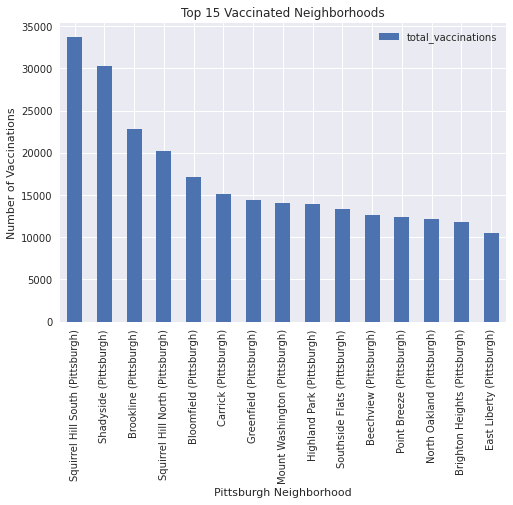

In [9]:
sorted_vax.plot(kind="bar")
plt.title("Top 15 Vaccinated Neighborhoods")
plt.xlabel("Pittsburgh Neighborhood")
plt.ylabel("Number of Vaccinations")
plt.style.use('seaborn')

The top three vaccinated neighborhoods are:
1. Squirrel Hill South
2. Shadyside
3. Brookline 

For a little more detail, let's plot a breakdown of these total vaccination results. Let's look at the number of partial vaccinations, full vaccinations, and booster vaccinations that make up the total number of vaccinations for each neighborhood.

In [10]:
total_stack = burgh_covid.groupby(['neighborhood_municipality']).sum()
def filt(x, threshold):
    return x["total_vaccinations"].sum() > threshold
high_stack= total_stack.groupby("neighborhood_municipality").filter(filt, threshold= 10000)
high_stack.groupby("neighborhood_municipality").sum()
sorted_stack= high_stack.sort_values(by=['total_vaccinations'],ascending=False)
graph_stack= sorted_stack.loc[:, ~sorted_stack.columns.isin(['total_vaccinations'])]

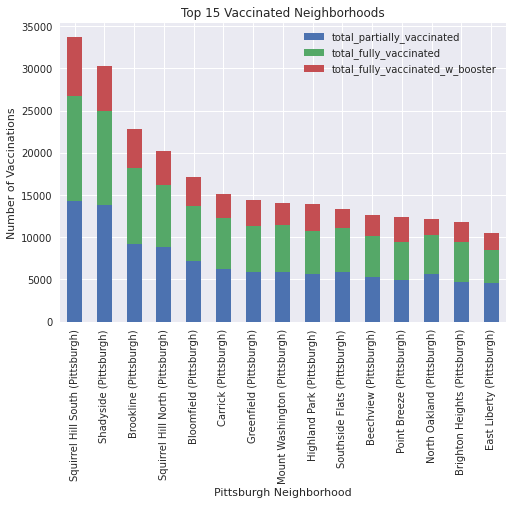

In [11]:
graph_stack.plot.bar(stacked=True)
plt.title("Top 15 Vaccinated Neighborhoods")
plt.xlabel("Pittsburgh Neighborhood")
plt.ylabel("Number of Vaccinations")
plt.style.use('seaborn')

#### Squirrel Hill South is the Best Neighborhood!

Our measure of "bestness" was which neighborhood is the healthiest. Additionally, this metric defines the healthiest neighborhood as the one with the most total COVID-19 vaccinations. So, since **Squirrel Hill South** has the most total COVID-19 vaccinations reported, they are the healthiest!

Second place goes to Shadyside, and third place goes to Brookline.

Finally, for the group metric, let's assign each neighborhood a rank using the `.rank()` method. Higher numbers of total vaccinations (healthiest neighborhoods) correspond with a lower rank number. For example, the healthiest neighborhood, Squirrel Hill South, has a rank of 1.

In [12]:
rank_copy = total_vax.copy()
rank_copy['vax_rank']= rank_copy['total_vaccinations'].rank(ascending=False)
keepit = rank_copy['vax_rank']
rank_data = keepit.dropna()
covid_rank= pd.DataFrame(rank_data)
rank_sort= covid_rank.sort_values(by=['vax_rank'], ascending=True)
rank_sort

,vax_rank
neighborhood_municipality,
Squirrel Hill South (Pittsburgh),1.0
Shadyside (Pittsburgh),2.0
Brookline (Pittsburgh),3.0
Squirrel Hill North (Pittsburgh),4.0
Bloomfield (Pittsburgh),5.0
...,...
Esplen (Pittsburgh),87.0
St. Clair (Pittsburgh),88.0
Arlington Heights (Pittsburgh),89.0


#### Group Metric

For our group metric, we assign a rank to each of the neighborhoods for the COVID-19 vaccination and asthma datasets. For this metric, the healthier the neighborhood, the lower the numeric rank. (The healthiest neighborhood has a rank of 1.0). The higher the number of total vaccinations, the better (lower) the rank. The lower the ratio of asthma healthcare use to the number of members in the neighborhood, the better the rank. The rankings for the neighborhoods in the asthma data set and the COVID-19 data set will be added to get a rank score. Since the indoor air exemption neighborhood list was not exhaustive, it is used to weight neighborhood rank scores depending on the number of exemptions.

In [14]:
rank_sort

,vax_rank
neighborhood_municipality,
Squirrel Hill South (Pittsburgh),1.0
Shadyside (Pittsburgh),2.0
Brookline (Pittsburgh),3.0
Squirrel Hill North (Pittsburgh),4.0
Bloomfield (Pittsburgh),5.0
...,...
Esplen (Pittsburgh),87.0
St. Clair (Pittsburgh),88.0
Arlington Heights (Pittsburgh),89.0


Here are the rankings of each neighborhood in the data set looking at the total number of COVID-19 vaccinations. 

#### Conclusions

**Kate:** The healthiest neighborhood according to our group metric was **Shadyside**, with second place being Squirrel Hill South. These results were not surprising to me, since they closely matched my metric of the total number of COVID-19 vaccinations. The top two from my sub-metric were also Squirrel Hill South and Shadyside, just with Squirrel Hill South in first place and Shadyside in second. The top two healthiest neighborhoods are both residential neighborhoods located right next to each other. These neighborhoods being the healthiest respiratory-wise makes sense since they are away from the heart of the city where air quality is poorer. Additionally, these residential areas have lots of access to pharmacies that administer COVID-19 vaccinations.

### Metric #2: Healthcare Utilization for Asthma by Minors in Allegheny County (Emma Chau)

In order to determine which neighborhood in Pittsburgh, our group has decided to look at healthiness as our main metric. In order to measure healthiness, we need to determine a submetric. Pittsburgh has notoriously bad air quality, so I have selected a dataset that deals with the asthma healthcare utilization of minors. Basically, we will sum up the totals in the columns *ED_visits*, *ED_hosp*, *UC_visits*, and *Asthma_use* to give us the number of utilizations. Below, I have defined the more confusing terms of the columns.
- **Total_members**: Number of Allegheny County residents under 18 who were enrolled in Gateway, Highmark , or UPMC health plans for at least 90 continuous days in 2017
- **Asthma_use**: Asthma healthcare utilization
    * Number of Total_members who experienced at least 1 asthma-related:
        - emergency department visit
        - acute inpatient encounter
        - outpatient visit or observational stay
        - asthma controller medication dispensing event
        
For this dataset **asthma** is defined by the [International Classification of Diseases, Tenth Revision](https://icd.who.int/browse10/2016/en#/J40-J47)

We have briefly introduced the submetric. However, to make things more fair, I have decided to rank neighborhoods based on the ratio of asthma healthcare use to total members. This represents the fraction of (insured) minors who reported asthma-like symptoms. Some areas have a very low amount of total_members, for example five or so people, so measuring the ratio will make it more proportional.

Let's get started! First, we will need to import the necessary libraries.

In [2]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

My main dataset has census tract ID numbers instead of the names of neighborhoods, so I am taking two different datasets to first get the neighborhood names. We can see that both datasets have many columns. However, I only need certain columns to match up the geo ids with the neighborhood names; those being "tract_ce", "geoid" from dataset 1 and "geoid10" and "hood" from dataset 2.

In [6]:
#load dataset 1
census2016_data = pd.read_csv("etc28_datasets/census2016.csv")
census2016_data.head(5)

,fid,state_fp,county_fp,tract_ce,affgeoid,geoid,name,lsad,a_land,a_water,shape_length,shape_area
0,1,42,3,50900,1400000US42003050900,42003050900,509.0,CT,452643,4114,0.045048,0.000046
1,2,42,3,70300,1400000US42003070300,42003070300,703.0,CT,428546,0,0.028484,0.000046
2,3,42,3,120700,1400000US42003120700,42003120700,1207.0,CT,514927,0,0.031372,0.000055
3,4,42,3,140400,1400000US42003140400,42003140400,1404.0,CT,834995,0,0.038374,0.000089
4,5,42,3,180700,1400000US42003180700,42003180700,1807.0,CT,393380,0,0.026142,0.000042


In [7]:
#load dataset 2
other_census_data = pd.read_csv("etc28_datasets/census_tract.csv")
other_census_data.head(5)

,objectid,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,aland10,...,objectid_1,tractce10_1,cnt_tractce10,sum_lowmod2018,sum_lowmoduniv,lowmodperct,lowmodpercanno,cdbg2018,shape_area,shape_length
0,1,42,3,40500,1,420030405001,Block Group 1,G5030,S,268195,...,7,40500,2,2775,2985,92.964824,92.96,Yes,5.079492e+06,10442.036450
1,2,42,3,40400,1,420030404001,Block Group 1,G5030,S,75472,...,6,40400,2,1365,2020,67.574257,67.57,Yes,2.105489e+06,6609.688123
2,3,42,3,40200,2,420030402002,Block Group 2,G5030,S,282679,...,5,40200,2,1070,1290,82.945736,82.94,Yes,5.998649e+06,18280.484081
3,4,42,3,30500,2,420030305002,Block Group 2,G5030,S,284548,...,4,30500,2,1635,2130,76.760563,76.76,Yes,7.203631e+06,15694.771444
4,5,42,3,980000,1,420039800001,Block Group 1,G5030,S,637235,...,125,980000,1,65,220,29.545455,29.54,No,7.764866e+06,13581.875089


Here, I am taking those specific columns we talked about earlier from the both datasets to falicitate the merge of the two.

In [8]:
geoids = pd.DataFrame(columns = ["Census_tract", "tract_ce"])
geoids["Census_tract"] = census2016_data["geoid"]
geoids["tract_ce"] = census2016_data["tract_ce"]
geoids.head(5)

,Census_tract,tract_ce
0,42003050900,50900
1,42003070300,70300
2,42003120700,120700
3,42003140400,140400
4,42003180700,180700


In [9]:
neighborhoods = pd.DataFrame(columns = ["Neighborhood", "tract_ce"])
neighborhoods["Neighborhood"] = other_census_data["hood"]
neighborhoods["tract_ce"] = other_census_data["tractce10"]
neighborhoods.head(5)

,Neighborhood,tract_ce
0,Central Oakland,40500
1,North Oakland,40400
2,West Oakland,40200
3,Crawford-Roberts,30500
4,Lincoln-Lemington-Belmar,980000


Now I am merging datasets 1 and 2 to get the information that needs merge with the main dataset.

In [11]:
census_data = pd.merge(neighborhoods, geoids)
census_data.head(5)

,Neighborhood,tract_ce,Census_tract
0,Central Oakland,40500,42003040500
1,North Oakland,40400,42003040400
2,West Oakland,40200,42003040200
3,Crawford-Roberts,30500,42003030500
4,Lincoln-Lemington-Belmar,980000,42003980000


Now, I am loading the main dataset. We can see the columns are the terms I introduced at the beginning.

In [13]:
asthma_data = pd.read_csv("etc28_datasets/asthma.csv")
asthma_data.head(5)

,Census_tract,ED_visits,ED_hosp,UC_visits,Asthma_use,Total_members
0,42003010300,2,0,0,6,83
1,42003020100,32,19,3,223,2114
2,42003020300,0,0,0,2,48
3,42003030500,11,3,3,61,422
4,42003040200,2,1,1,18,138


Below, I am combining both datasets together to make sense of which neighborhood has what values.

In [14]:
complete_asthma_data = census_data.merge(asthma_data, on = "Census_tract", how = "right")
complete_asthma_data.head(5)

,Neighborhood,tract_ce,Census_tract,ED_visits,ED_hosp,UC_visits,Asthma_use,Total_members
0,Bluff,10300.0,42003010300,2,0,0,6,83
1,Central Business District,20100.0,42003020100,32,19,3,223,2114
2,Strip District,20300.0,42003020300,0,0,0,2,48
3,Crawford-Roberts,30500.0,42003030500,11,3,3,61,422
4,West Oakland,40200.0,42003040200,2,1,1,18,138


At this point, I am creating a new, clearer dataframe now that I don't need the tract numbers.

In [15]:
asthma_data = pd.DataFrame(columns = ["Neighborhood", "ED_visits", "ED_hosp", "UC_visits", "Asthma_use", "Total_members"])
asthma_data["Neighborhood"] = complete_asthma_data["Neighborhood"]
asthma_data["ED_visits"] = complete_asthma_data["ED_visits"]
asthma_data["ED_hosp"] = complete_asthma_data["ED_hosp"]
asthma_data["UC_visits"] = complete_asthma_data["UC_visits"]
asthma_data["Asthma_use"] = complete_asthma_data["Asthma_use"]
asthma_data["Total_members"] = complete_asthma_data["Total_members"]
asthma_data.head(10)

,Neighborhood,ED_visits,ED_hosp,UC_visits,Asthma_use,Total_members
0,Bluff,2,0,0,6,83
1,Central Business District,32,19,3,223,2114
2,Strip District,0,0,0,2,48
3,Crawford-Roberts,11,3,3,61,422
4,West Oakland,2,1,1,18,138
5,North Oakland,0,0,0,1,17
6,Central Oakland,0,0,0,3,44
7,Central Oakland,0,0,0,0,15
8,South Oakland,1,1,0,8,135
9,Middle Hill,13,7,0,46,359


Because some of the values are strings that look like ints, below I am just making sure all the values in the data are ints using `.astype()`. In order to sum up the totals for each neighborhood, all the entered values must be the same type.

In [16]:
asthma_data['ED_visits'] = asthma_data['ED_visits'].astype(int)
asthma_data['ED_hosp'] = asthma_data['ED_hosp'].astype(int)
asthma_data['UC_visits'] = asthma_data['UC_visits'].astype(int)
asthma_data['Asthma_use'] = asthma_data['Asthma_use'].astype(int)
asthma_data['Total_members'] = asthma_data['Total_members'].astype(int)

Above we can see that some neighborhoods are repeated. We will need to consolidate the numbers of those repeat neighborhoods before proceeding.

In [17]:
agg_functions = {'ED_visits': 'sum', 'ED_hosp': 'sum', 'UC_visits':'sum', 'Asthma_use':'sum', 'Total_members':'sum'}
asthma_data_new = asthma_data.groupby(asthma_data['Neighborhood']).aggregate(agg_functions)
asthma_data_new.head(5)

,ED_visits,ED_hosp,UC_visits,Asthma_use,Total_members
Neighborhood,,,,,
Allegheny West,1,1,0,10,181
Allentown,10,9,2,41,477
Arlington,6,3,0,38,447
Banksville,5,4,2,36,391
Bedford Dwellings,12,7,1,44,369


Now we can finally get into our main data! We can start by adding up all ED visits, ED hospitalizations, UC visits, and other asthma healthcare utilizations under the **Combined total** column. Again, to make our final rankings more fair, I am taking the combined total and dividing it by the total members in that neighborhood to get a **ratio**. We will use this ratio in order to rank which neighborhoods are the most healthy.

In [19]:
cols = ['ED_visits', 'ED_hosp', 'UC_visits']
allcols = ['ED_visits', 'ED_hosp', 'UC_visits', "Asthma_use"]

for row in asthma_data_new:
    #asthma_data_new["ED/UC Visits and Hospitalizations"] = asthma_data_new[cols].sum(axis = 1)
    asthma_data_new["Combined total"] = asthma_data_new[allcols].sum(axis = 1)
    asthma_data_new["Ratio"] = asthma_data_new["Combined total"]/asthma_data_new["Total_members"]
asthma_data_new.head(5)

,ED_visits,ED_hosp,UC_visits,Asthma_use,Total_members,Combined total,Ratio
Neighborhood,,,,,,,
Allegheny West,1,1,0,10,181,12,0.066298
Allentown,10,9,2,41,477,62,0.129979
Arlington,6,3,0,38,447,47,0.105145
Banksville,5,4,2,36,391,47,0.120205
Bedford Dwellings,12,7,1,44,369,64,0.173442


We will sort the data based on the ratio column from lowest to highest in order to get an idea of which neighborhoods have the lowest ratio.

In [20]:
asthma_data_sorted = asthma_data_new.sort_values("Ratio", ascending = True)
asthma_data_sorted.head(10)

,ED_visits,ED_hosp,UC_visits,Asthma_use,Total_members,Combined total,Ratio
Neighborhood,,,,,,,
Chateau,0,0,0,0,5,0,0.000000
North Oakland,0,0,0,4,121,4,0.033058
Strip District,0,0,0,2,48,2,0.041667
Central Oakland,0,0,0,3,59,3,0.050847
Shadyside,3,0,1,37,791,41,0.051833
Westwood,2,0,1,28,594,31,0.052189
Regent Square,0,0,0,8,134,8,0.059701
Point Breeze,2,0,0,51,856,53,0.061916
Squirrel Hill South,7,0,1,136,2248,144,0.064057


We will now plot the neighborhoods with the lowest ratio of asthma healthcare utilization to total members to better visualize our results.

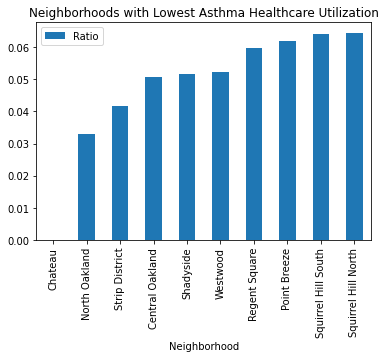

In [21]:
plt = asthma_data_sorted.iloc[:10].plot(kind = 'bar',
                                         y = "Ratio", 
                                         title = "Neighborhoods with Lowest Asthma Healthcare Utilization")

From this data, we can see the neighborhoods with the lowest utilization ratios. However, I am choosing to make the decision to omit Chateau at number one due to the low amount of total members (Chateau's falls at 5 members). Therefore, our list is:
1. North Oakland
2. Strip District
3. Central Oakland
4. Shadyside
5. Westwood

#### Ranking for the Group Metric

Our group's overall metric was healthiest neighborhood. In order to measure our group metric, we will assign each neighborhood a rank using the `.rank()` function. A lower ratio (less asthma healthcare utilization) corresponds to a higher ranking.

In [22]:
rank_copy = asthma_data_sorted.copy()
rank_copy["ratio_rank"] = rank_copy["Ratio"].rank(ascending = True)
ratio_rank = pd.DataFrame(rank_copy)
rank_sort = ratio_rank.sort_values(by = ["ratio_rank"], ascending = True)
rank_sort.head(11)

,ED_visits,ED_hosp,UC_visits,Asthma_use,Total_members,Combined total,Ratio,ratio_rank
Neighborhood,,,,,,,,
Chateau,0,0,0,0,5,0,0.000000,1.0
North Oakland,0,0,0,4,121,4,0.033058,2.0
Strip District,0,0,0,2,48,2,0.041667,3.0
Central Oakland,0,0,0,3,59,3,0.050847,4.0
Shadyside,3,0,1,37,791,41,0.051833,5.0
Westwood,2,0,1,28,594,31,0.052189,6.0
Regent Square,0,0,0,8,134,8,0.059701,7.0
Point Breeze,2,0,0,51,856,53,0.061916,8.0
Squirrel Hill South,7,0,1,136,2248,144,0.064057,9.0


Therefore, because we are not including Chateau, our winner for this submetric is North Oakland with the lowest ratio at 0.033! In second, we have the Strip District with a ratio of 0.042, and for third, we have Central Oakland with a ratio of 0.051.

#### Conclusions

**Emma**: For my own dataset, my top neighborhood was North Oakland with the lowest ratio of asthma healthcare use at 0.033, however, it did not make it into the top neighborhoods compared to my group’s metrics. **Shadyside** was our group’s top neighborhood and was ranked 4th on my dataset (excluding Chateau). While my dataset’s rankings were not exactly the same, many of the top neighborhoods we looked at collectively were at least in my top 30. Personally, I agree with our findings with Shadyside being the best neighborhood. I like the food places around that area and they have some fun little stores, too. But its relaxing, neighborhoodly atmosphere makes sense with our data. My reasoning for liking Shadyside may be different than our metric, but, either way, our data can be helpful to those who are immunocompromised and looking for the healthiest place to live.



### Metric #3: Clear Indoor Air Act Exemptions

The clean indoor air act is a Pennsylvanian act regulating and often prohibiting smoking in workplaces and public places. As we know that smoking and even second-hand smoking can cause serious health issues, we thought it would be worthwhile to examine the number of exemptions in buildings by neighborhood. This can help us infer what the smoking habits of certain neighborhoods are, as well as localized air pollution both indoors and outdoors.

### Calculations
In order to determine which neighborhoods were optimal with regards to the permissiveness (or lack thereof) of indoor smoking, I used the dataset "ciaa-exemptions-uncoordinated.csv", which lists establishments in the Pittsburgh metropolitan area by their category, name, coordinates, and licensing infomration. This was iterated through easily using pandas functions.

In [10]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

exempt = pd.read_csv("ciaa-exemptions-uncoordinated.csv")
print(exempt.sample(2))

zip_counts = {}
x_list = []
y_list = []

for index, row in exempt.iterrows():
    if row['Bus_Phys_1'] == 'Pittsburgh':
        placeholder = row['Bus_Phys_3']
        str_place = str(placeholder)
        if str_place.startswith("16"):
            continue;
        if placeholder not in zip_counts:
            zip_counts[placeholder] = 1
        else:
            zip_counts[placeholder] += 1
            
zip_counts[15203] = zip_counts[15203] + zip_counts[15210]
del zip_counts[15210]
zip_counts[15201] = zip_counts[15201] + zip_counts[15209]
del zip_counts[15209]        

for item in zip_counts:
    print(item, "|", zip_counts[item])
    print("-----------")

     Shape                       Bus_Type    Status              Establishm  \
309  Point  Drinking Establishment Type I  Approved         PIPA Group, LLC   
271  Point  Drinking Establishment Type I  Approved  Happy Day Lounge, Inc.   

            Trade_Name             Bus_Physic  Bus_Phys_1 Bus_Phys_2  \
309  Clark Bar & Grill  503 Martindale Street  Pittsburgh         PA   
271                NaN       313 North Avenue  Pittsburgh         PA   

     Bus_Phys_3  Latitude_A  Longitude_  DE_LID_Num License_Nu  
309       15212   40.448988  -80.008871     61293.0     R-4105  
271       15209   40.482126  -79.974163     10049.0    R-01552  
15123 | 1
-----------
15201 | 19
-----------
15202 | 6
-----------
15203 | 37
-----------
15204 | 1
-----------
15205 | 10
-----------
15206 | 2
-----------
15207 | 4
-----------
15208 | 7
-----------
15211 | 3
-----------
15212 | 19
-----------
15213 | 7
-----------
15215 | 7
-----------
15216 | 5
-----------
15217 | 3
-----------
15218 | 5
------

For the purposes of our study, most of this information is not necessarily relevant. So, using pandas, we selected for one primary piece of information: zipcodes. Using a dictionary data structure, I iterated through the list to count the number of occurences of each Pittsburgh neighborhood zipcode. This allowed me to determine which of the neighborhoods provided in the document have the most indoor-smoking. This also allowed me to consider what neighborhoods do NOT have instances of indoor smoking, which was also beneficial for the combined metrics.

Unfortunately, this dataset did not list neighborhoods by name, so those needed to be derived from said zip codes.

The list generated has a spread of values for neighborhoods with indoor-smoking ban exemptions. The neighborhoods for each zipcode listed are shown below.

<b>
    
* 15123 ---> West Mifflin
* 15201 ---> Lower Lawrenceville
* 15202 ---> Bellevue
* 15203 ---> South Side Slopes
* 15204 ---> Sheraden
* 15205 ---> Crafton Heights
* 15206 ---> East Liberty
* 15207 ---> Hazelwood
* 15208 ---> Homewood
* 15209 ---> Lower Lawrenceville
* 15210 ---> South Side Slopes
* 15211 ---> Duquesne Heights
* 15212 ---> North Shore
* 15213 ---> Oakland
* 15214 ---> Summer Hill
* 15215 ---> Morningside
* 15216 ---> Beechview
* 15217 ---> Squirrel Hill North
* 15218 ---> Swissvale
* 15219 ---> Hill District
* 15220 ---> Elliott
* 15221 ---> East Hills
* 15222 ---> Troy Hill
* 15223 ---> Etna
* 15224 ---> Bloomfield
* 15225 ---> Neville Township
* 15226 ---> Brookline
* 15227 ---> Brentwood
* 15228 ---> Mt. Lebanon 
* 15229 ---> West View
* 15230 ---> Downtown
* 15231 ---> Moon (Airport)
* 15232 ---> Bloomfield
* 15233 ---> Northshore
* 15234 ---> Overbrook
* 15235 ---> Laketon Heights
* 15236 ---> St. Claire
* 15237 ---> McKnight
* 15238 ---> Upper Oakmont 
* 15239 ---> Holiday Park
</b>


You may notice that this list is not exhaustive---this is because not all neighborhoods in Pittsburgh have exemptions. Because of this, this data is best interpreted alongside the other metrics we chose to gather.

Note that, to gather this data, we needed to filter for buildings located in "Pittsburgh", as seen in the code above. The dataset included exemptions in the Allegheny county area, which could be misleading if not filtered out. This is why there are filters to check for out of range zip prefixes.

## Visualizing the data
To get a better understanding of what this data is showing us, we will make a bar graph. This can be done easily by dissecting our dictionary of values. For ease of visualization, the dictionary was sorted prior to reconstituting as a dataframe using pandas.

### Extra details 
Also provided is zipcodes organized by number of exemption locations. This provides a weight by which we can understand the severity of exemptions, and will be useful in combination with the team's other metrics, which use a different ranking system.

#### *The ranking is as follows:*

* If not on list (no exemptions, discoverable when compared with other's data): **good ranking**
* If on list but less than 5 exemptions: **neutral ranking**
* If on list with more than 5 exemptions: **poor ranking**
* if on list with more than ten exemptions: **very poor ranking**

## Visualizing the data
To get a better understanding of what this data is showing us, we will make a bar graph. This can be done easily by dissecting our dictionary of values. For ease of visualization, the dictionary was sorted prior to reconstituting as a dataframe using pandas.

### Extra details 
Also provided is zipcodes organized by number of exemption locations. This provides a weight by which we can understand the severity of exemptions, and will be useful in combination with the team's other metrics, which use a different ranking system.

#### *The ranking is as follows:*

* If not on list (no exemptions, discoverable when compared with other's data): **good ranking**
* If on list but less than 5 exemptions: **neutral ranking**
* If on list with more than 5 exemptions: **poor ranking**
* if on list with more than ten exemptions: **very poor ranking**

------------------------------------------------------
Zipcodes with under five exemptions: [15123, 15204, 15206, 15207, 15211, 15217, 15220, 15221, 15228, 15232, 15233, 15238]
Zipcodes with over five exemptions: [15202, 15208, 15213, 15215, 15216, 15218, 15222, 15223, 15224, 15226, 15227, 15229, 15234, 15236, 15237, 15239]
Zipcodes with over ten exemptions: [15201, 15203, 15205, 15212, 15219, 15235]
------------------------------------------------------
Most Exemptions overall: 15203 -> 37
Least Exemptions overall: 15123 -> 1


[Text(0, 0, '15123')]

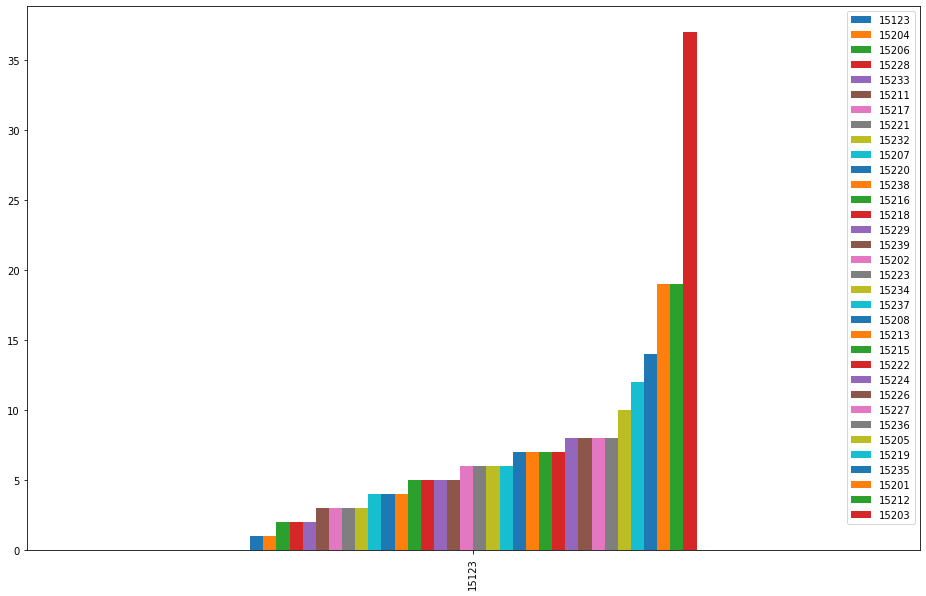

In [14]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

exempt = pd.read_csv("ciaa-exemptions-uncoordinated.csv")
exempt.head()

zip_counts = {}
x_list = []
y_list = []

for index, row in exempt.iterrows():
    if row['Bus_Phys_1'] == 'Pittsburgh':
        placeholder = row['Bus_Phys_3']
        str_place = str(placeholder)
        if str_place.startswith("16"):
            continue;
        if placeholder not in zip_counts:
            zip_counts[placeholder] = 1
        else:
            zip_counts[placeholder] += 1
            
zip_counts[15203] = zip_counts[15203] + zip_counts[15210]
del zip_counts[15210]
zip_counts[15201] = zip_counts[15201] + zip_counts[15209]
del zip_counts[15209]        

################ WEIGHTING BELOW ---v 
under_five = []
five_plus = []
ten_plus = []

least = 100
most = 0
least_zip = ""
most_zip = ""

for item in zip_counts:
    if zip_counts[item] < 5:
        under_five.append(item)
    if zip_counts[item] >= 5 and zip_counts[item] < 10:
        five_plus.append(item)
    if zip_counts[item] >= 10:
        ten_plus.append(item)
        
    if zip_counts[item] > most:
        most = zip_counts[item]
        most_zip = item
        
    if zip_counts[item] < least:
        least = zip_counts[item]
        least_zip = item
        
print("------------------------------------------------------")
print("Zipcodes with under five exemptions:", under_five)
print("Zipcodes with over five exemptions:", five_plus)
print("Zipcodes with over ten exemptions:", ten_plus)
print("------------------------------------------------------")
print("Most Exemptions overall:", most_zip, "->", most)
print("Least Exemptions overall:", least_zip, "->", least)

################ GRAPHING BELOW ---v 

#sorting our values by increasing size
sort = dict(sorted(zip_counts.items(), key=lambda item: item[1]))

new_frame = pd.DataFrame(sort, index=[len(sort)])

new_plot = new_frame.plot(kind = 'bar', figsize=(16, 10))

x_labels = list(sort.keys())
new_plot.set_xticklabels(x_labels)

## Metric 3 CONCLUSION:
From the data we have collected, it is clear that our best neighborhood is West Mifflin with only one exemption (also tied is Sheraden), on the condition of the existence of CIAA exemptions. By far the worst-performing neighbhorhood is the South Slide slopes, with a whopping 37 exemptions. This staggering difference is likely due to the South Side's abundance of bars and pubs, which are often smoker-friendly environments. 

For the purposes of combined metric rankings, we have most importantly sorted neighborhoods with exemptions by the severity of their rankings. When combined with group data, this will be useful for weighing on what neighborhood is the healthiest and thus most optimal, depending on where the other metrics land for those said neighborhoods.

Working with this dataset and facing complications due to a non-exhaustive list of neighborhoods, as well as some zipcode translations, has been an interesting experience. Overall, this tells us that it is valuable to use multiple metrics when attempting to draw a conclusion about a set of data. Using a dataset as unusual as a list of locations with no-indoor-smoking exemptions also demonstrates that valuable information for cause can be illuminated from the most unexpected sources with the right programming skills.

# FINAL TEAM CONCLUSION

In order to determine the **best overall** metric, we need determine how to make our data compatible for analysis. This is not an immediately clear objective, as because our datasets are all unique, rankings may vary considerably.

For the first metric, neighborhoods with the most covid vaccinations were ranked using the .rank() method, with a lower rank corresponding to higher number of COVID vaccinations---and thus better potential respiratory health. From this metric alone, Squirrel Hill South was in first place for best neighborhood.

For the second metric, neighborhoods were sorted by their ratios of population/asthma incidents and also organized with the rank method, with lower rank determining a healthier neighborhood.

For the third metric, neighborhoods were sorted in a dictionary via the sort method after being extracted, and the bar graph visualizes the ranking of the number of exemptions in ascending order. From this information, we got West Mifflin/Sheraden as the optimal neighborhoods. This information also had useful information in its absence of data---we could identify neighborhoods with no exemptions by their absence, meaning that if these neighborhoods appeared in other metrics, it might help determine results.


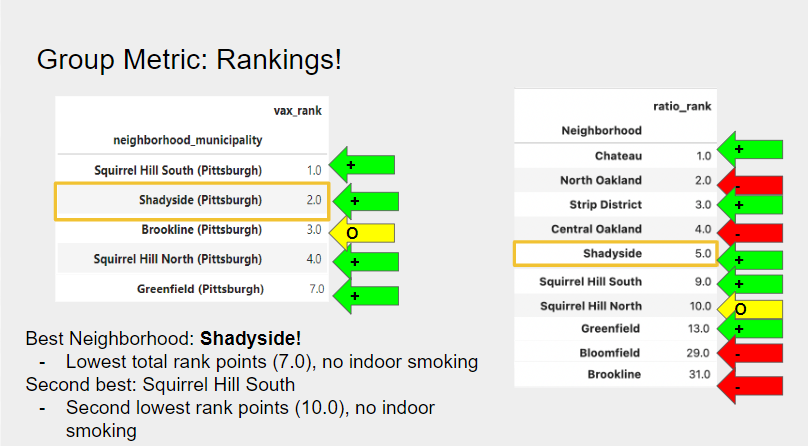


To determine the best overall neighborhood, the top ranking cities of each neighborhood of the first two metrics were compared to determine similarities. From this comparison, we found that Shadyside was among the top five ranked in both of these metrics.

In this comparison, the the metric (indoor-smoking ban exemptions), served to move neighborhoods up and down in ranking depending on the severity of indoor smoking. This effectively served as tie-breaker in close scenarios.

**From data metric three:**
* Neighborhoods with no reports of exemptions would move up in rank relative to others
* Neighborhoods with under five reports of exemptions would move neither up nor down
* Neighborhoods with over five reports of exemption would move down in rank relative to others
* Neighborhoods with over ten reports of exemption would move down TWICE in rank relative to others
(this is represented with colored arrows in schematic. Green for up, red for down, yellow for neutral)

Given that Shadyside had no incidents of CIAA exemptions which might effect its rank relative to other high-ranking neighborhoods, such as Squirrel Hill sectors, we decided that Shadyside was the best neighborhood in Pittsburgh. This makes sense with our general observations of the area, as Shadyside is generally very progressive and environmentally conscience space.

**Other Notes:
This exercise was an interesting experience, as it allowed us to combine seemingly sparsely related data and use it in unique ways to come to a conclusion about the status of various neighborhoods. Overall, it seems this was a great lesson in using multiple datasets and manipulating data to conduct research.
